In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [17]:
df=pd.read_csv('final_reviews.csv')
df.head()

,Review_Title,Reviews,Rating
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5
1,Enjoy while it lasts,This is the second time I am writing this revi...,2
2,Good,1. Quite good look2. Better noise cancellation...,4
3,not great,its a good set of ear buds but1. the quality o...,1
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5


In [18]:
def data_clean(text):
  if text=='The media could not be loaded.':
    return " "
  else:
    return text

In [19]:
df['Reviews']=df['Reviews'].apply(data_clean)

In [20]:
df.fillna('',inplace=True)

In [21]:
df['text']=df['Review_Title']+' '+df['Reviews']

In [22]:
df.sample(5)

,Review_Title,Reviews,Rating,text
160,"Can't attend meetings with them, they keep on ...",Sound quality is good but the feature of noise...,1,"Can't attend meetings with them, they keep on ..."
3380,The earbuds are unable to connect to each othe...,"Despite charging the earbuds for hours on end,...",1,The earbuds are unable to connect to each othe...
2596,#Scam,"Please don't buy. Battery backup is worst, not...",1,#Scam Please don't buy. Battery backup is wors...
3359,Overall crappy product for this price.,Very bad product.The product get obsolete in t...,3,Overall crappy product for this price. Very ba...
3931,"Not okay. Its has function issue, technical fa...","Technical issues, sound quality and no noise c...",1,"Not okay. Its has function issue, technical fa..."


In [23]:
df=df[df['Rating']!=3.0]

In [24]:
df.head()

,Review_Title,Reviews,Rating,text
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5,AWESOME...IN LOVE WITH IT ! Really impressed w...
1,Enjoy while it lasts,This is the second time I am writing this revi...,2,Enjoy while it lasts This is the second time I...
2,Good,1. Quite good look2. Better noise cancellation...,4,Good 1. Quite good look2. Better noise cancell...
3,not great,its a good set of ear buds but1. the quality o...,1,not great its a good set of ear buds but1. the...
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5,Best buds in the budget with Type C I have bee...


In [25]:
def rating_classify(rating):
  if rating>=4:
    return 1
  else:
    return 0

In [26]:
df['label']=df['Rating'].apply(rating_classify)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df.sample(5)

,Review_Title,Reviews,Rating,text,label
4524,Bassss!!!,"If u like bass, go for it. But voice is not cl...",4,"Bassss!!! If u like bass, go for it. But voice...",1
3283,Made in China,1 star only for receiving Made in China produc...,1,Made in China 1 star only for receiving Made i...,0
1860,Beast battery and great sound.,Purchased it on first day of launch at 2.5k.It...,4,Beast battery and great sound. Purchased it on...,1
211,Overall good product from Boat but there just ...,The product is overall extremely good who want...,4,Overall good product from Boat but there just ...,1
1198,waste of money.....,This is my first set of wireless earphones. My...,1,waste of money..... This is my first set of wi...,0


In [28]:
df.shape

(3987, 5)

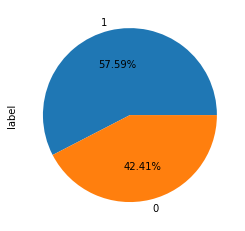

In [29]:
df['label'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [30]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
port_stem=PorterStemmer()
def text_processing(text):
  text=re.sub('[^a-zA-Z]',' ',text)
  text=text.lower()
  text=text.split()
  text = [port_stem.stem(word) for word in text if not word in stopwords.words('english')]
  text = ' '.join(text)
  return text

In [32]:
df['text']=df['text'].apply(text_processing)

In [33]:
df.head()

,Review_Title,Reviews,Rating,text,label
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5,awesom love realli impress fastest deliveri am...,1
1,Enjoy while it lasts,This is the second time I am writing this revi...,2,enjoy last second time write review sure earli...,0
2,Good,1. Quite good look2. Better noise cancellation...,4,good quit good look better nois cancel good ba...,1
3,not great,its a good set of ear buds but1. the quality o...,1,great good set ear bud qualiti sound get bad c...,0
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5,best bud budget type c research get nice tw bu...,1


In [34]:
df.drop(['Review_Title','Reviews'],axis=1,inplace=True)

In [35]:
df.head()

,Rating,text,label
0,5,awesom love realli impress fastest deliveri am...,1
1,2,enjoy last second time write review sure earli...,0
2,4,good quit good look better nois cancel good ba...,1
3,1,great good set ear bud qualiti sound get bad c...,0
4,5,best bud budget type c research get nice tw bu...,1


In [36]:
df.drop('Rating',axis=1,inplace=True)

In [37]:
df.sample(5)

,text,label
3083,good one need improv write review use day init...,1
3220,left bud stop work within month left ear bud s...,0
4272,defect product left air dope workingamazon hel...,0
503,think twice plan use handsfre drive use hand f...,1
4596,good wast money receiv product th may work fin...,0


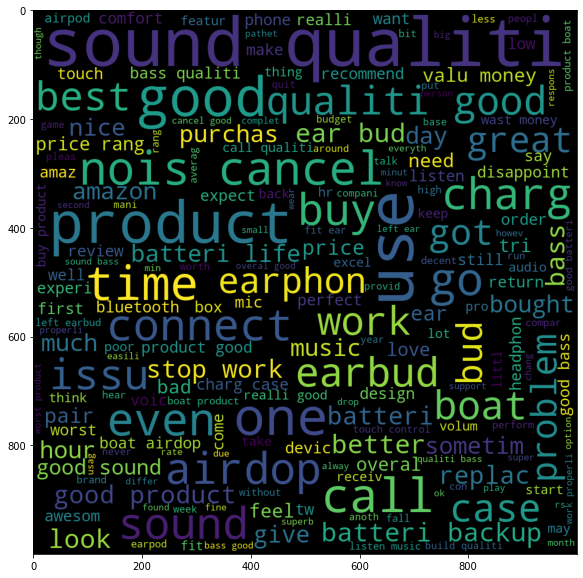

In [38]:
from wordcloud import WordCloud

wc=WordCloud(width=1000,height=1000)
wordcloud=wc.generate(df['text'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)

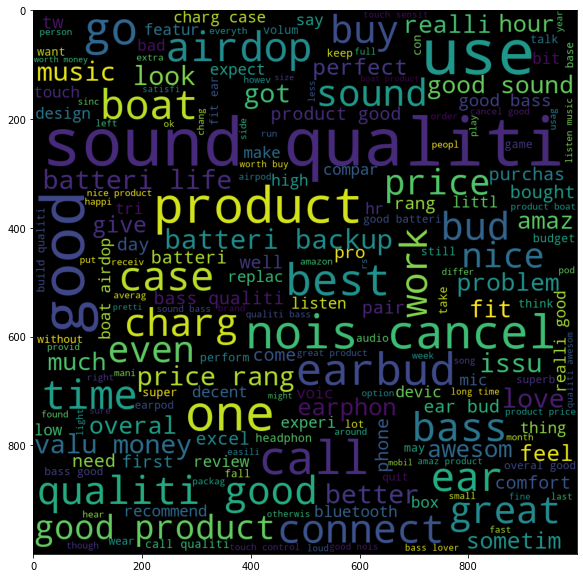

In [39]:
wc=WordCloud(width=1000,height=1000)
positive_wordcloud=wc.generate(df[df['label']==1]['text'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(positive_wordcloud)

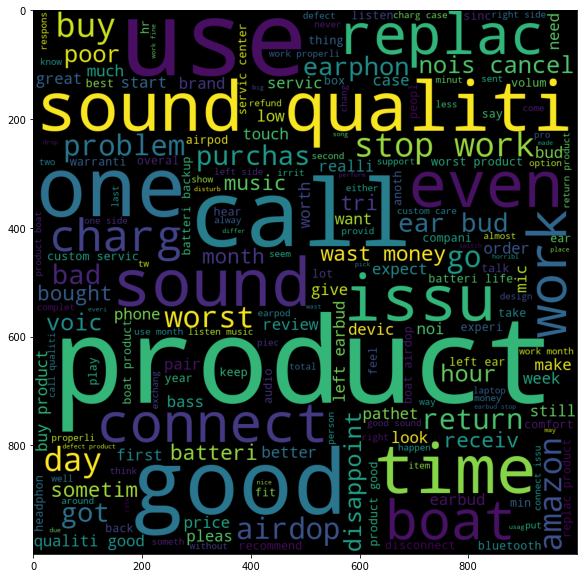

In [40]:
wc=WordCloud(width=1000,height=1000)
positive_wordcloud=wc.generate(df[df['label']==0]['text'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(positive_wordcloud)

In [41]:
tf=TfidfVectorizer(max_features=3000)
x=tf.fit_transform(df['text']).toarray()
y=df['label'].values

In [42]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier


In [44]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }

svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier( random_state=2)
abc = AdaBoostClassifier(random_state=2)
bc = BaggingClassifier(random_state=2)
etc = ExtraTreesClassifier(random_state=2)
gbdt = GradientBoostingClassifier(random_state=2)
xgb = XGBClassifier(random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    
    return accuracy


In [47]:
accuracy_scores = []

for name,clf in clfs.items():
    
    current_accuracy = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    accuracy_scores.append(current_accuracy)
    

In [48]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy
4,LR,0.862155
0,SVC,0.860902
8,ETC,0.858396
2,NB,0.843358
5,RF,0.842105
9,GBDT,0.840852
7,BgC,0.838346
10,xgb,0.833333
6,AdaBoost,0.828321
1,KN,0.778195


In [49]:
from sklearn.metrics import classification_report

In [50]:
model = SVC()
model.fit(x_train, y_train)
 
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       339
           1       0.86      0.90      0.88       459

    accuracy                           0.86       798
   macro avg       0.86      0.85      0.86       798
weighted avg       0.86      0.86      0.86       798



In [51]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
 

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']}
 
grid = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 

grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.575 total time=  18.9s
[CV 2/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.575 total time=  19.6s
[CV 3/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.577 total time=  19.1s
[CV 4/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.577 total time=  20.0s
[CV 5/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.576 total time=  19.0s
[CV 1/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.793 total time=  10.6s
[CV 2/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.812 total time=  11.3s
[CV 3/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.817 total time=  11.6s
[CV 4/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.803 total time=  10.9s
[CV 5/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.774 total time=  11.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.850 total time=  16.1s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'poly', 'sigmoid']},
                   verbose=3)

In [52]:
# rf_grid = GridSearchCV(estimator = rf, 
#                        param_grid = params, 
#                        cv = 5, 
#                        verbose=2, 
#                        n_jobs = -1)

In [53]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'kernel': 'rbf', 'gamma': 0.1, 'C': 1}
SVC(C=1, gamma=0.1)
0.8450918539588491


In [54]:
grid_predictions = grid.predict(x_test)
 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82       339
           1       0.85      0.92      0.88       459

    accuracy                           0.86       798
   macro avg       0.86      0.85      0.85       798
weighted avg       0.86      0.86      0.86       798

